In [ ]:
import numpy as np
import scipy.integrate as slv
import sympy as sym
import scipy.optimize as opt
import matplotlib.pyplot as plt

from scipy.integrate import odeint

from IPython.display import display, Latex

#Симметричный генетический триггер Жакобо-Мано

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= -x + \frac{L}{1+y^2} \\
\frac{dy}{dt} &= -y + \frac{L}{1+x^2}
\end{aligned}
\right.
$$
где $x$ и $y$ - уровни экспрессии двух взаимноингибирующих генов, $L$ - интенсивность ингибирования гена-антогониста.

Зададим начальный вариант для параметра системы и найдем численно корень уравнения. 

In [ ]:
Lr = 1

fun = lambda xt: -xt + Lr/(1+xt**2)
fun_with_L = lambda xt, Lt: -xt + Lt/(1+xt**2)

In [ ]:
res = opt.root_scalar(fun, x0 = 10, method='brentq', bracket=(-10,10) )

In [ ]:
res.root

0.6823278038276589

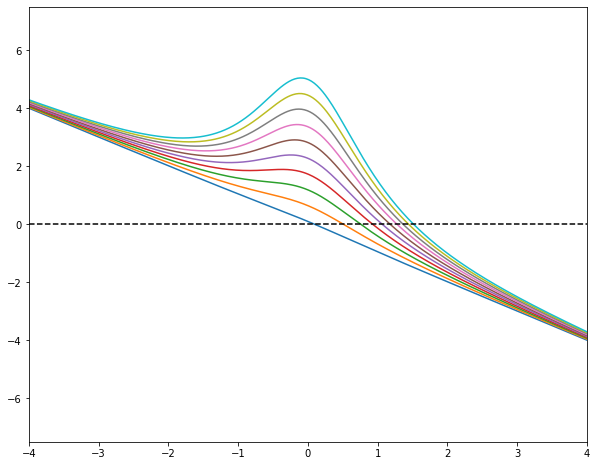

In [ ]:
xx = np.linspace(-10, 10, 1000)
ll = np.linspace(0.1, 5, 10)

plt.figure(figsize=(10, 8))

for Lt in ll:
  plt.plot(xx, fun_with_L(xx, Lt))
plt.ylim(-7.5, 7.5)
plt.xlim(-4, 4)
plt.axhline(0, color='black', ls='--')

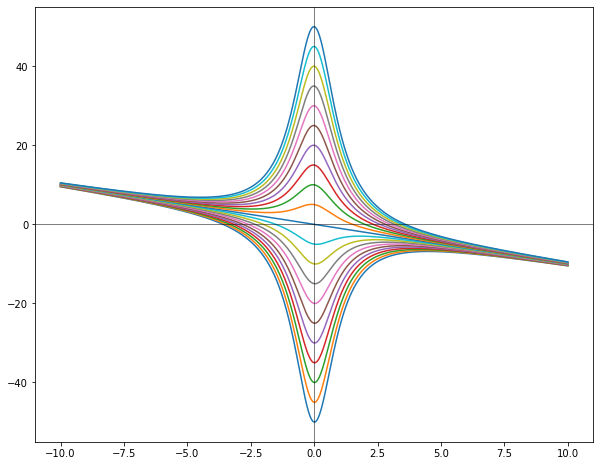

In [ ]:
xx = np.linspace(-10, 10, 1000)
ll = np.linspace(-50, 50, 21)

plt.figure(figsize=(10, 8))

for Lt in ll:
  plt.plot(xx, fun_with_L(xx, Lt))
# plt.ylim(-7.5, 7.5)
# plt.xlim(-4, 4)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

Если посмотреть получившиеся графики, то видно, что уравнение при $|x| > 5$ стремится к виду $y = x$, вблизи нуля имеет максимум при $L>0$ или минимум при $L < 0$. Так же у функции есть единственный корень.

## Исследование стабильности

In [ ]:
x, y, L, t, x0, y0 = sym.symbols('x,y,L,t,x0,y0')

x = sym.Function('x')(t)
y = sym.Function('y')(t)

In [ ]:
x_rate = -x + L/(1 + y**2)
y_rate = -y + L/(1 + x**2)

eq1 = sym.Eq(x.diff(t), x_rate)
eq2 = sym.Eq(y.diff(t), y_rate)

In [ ]:
eq1

Eq(Derivative(x(t), t), L/(y(t)**2 + 1) - x(t))

In [ ]:
J = sym.Matrix([x_rate, y_rate]).jacobian(sym.Matrix([x,y]))
J

Matrix([
[                        -1, -2*L*y(t)/(y(t)**2 + 1)**2],
[-2*L*x(t)/(x(t)**2 + 1)**2,                         -1]])

In [ ]:
J_eigenvects = J.eigenvects()
J_eigenvects[0][0]

-2*L*sqrt((x(t)**4*y(t)**4 + 2*x(t)**4*y(t)**2 + x(t)**4 + 2*x(t)**2*y(t)**4 + 4*x(t)**2*y(t)**2 + 2*x(t)**2 + y(t)**4 + 2*y(t)**2 + 1)*x(t)*y(t))/(x(t)**4*y(t)**4 + 2*x(t)**4*y(t)**2 + x(t)**4 + 2*x(t)**2*y(t)**4 + 4*x(t)**2*y(t)**2 + 2*x(t)**2 + y(t)**4 + 2*y(t)**2 + 1) - 1

In [ ]:
f_eigen1 = sym.lambdify([x, y, L], sym.re(J_eigenvects[0][0]))
f_eigen2 = sym.lambdify([x, y, L], sym.re(J_eigenvects[1][0]))

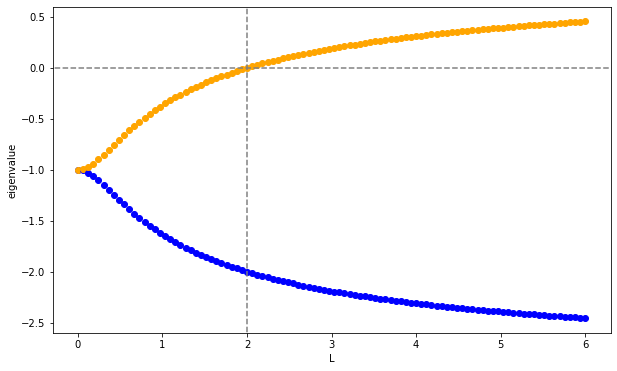

In [ ]:
plt.figure(figsize=(10, 6))

ll = np.linspace(0, 6, 100)
for Lt in ll:
  res = opt.root_scalar(fun_with_L, x0 = 1, args=(Lt,), method='brentq', bracket=(0,10) )
  x_root = y_root = res.root

  plt.scatter(Lt, f_eigen1(x_root, y_root, Lt), color='blue')
  plt.scatter(Lt, f_eigen2(x_root, y_root, Lt), color='orange')

plt.xlabel("L")
plt.ylabel("eigenvalue")
plt.axhline(0, -4, 4, color="grey", linestyle="--")
plt.axvline(2, -4, 4, color="grey", linestyle="--")

plt.show()

При $L \le 2$ стационарная точка является устойчивым узлом, при $L > 2$ стационарная точка является седлом.

## Точки

Узел

In [ ]:
Lr = 1
P1 = lambda xt,yt: -xt + Lr/(1+yt**2)
Q1 = lambda xt,yt: -yt + Lr/(1+xt**2)

fun1 = lambda p,t: [ P1(p[0],p[1]), Q1(p[0],p[1]) ]


In [ ]:
res1 = opt.root_scalar(fun_with_L, x0 = 10, method='brentq', bracket=(-10,10), args=(0.2,) )
res2 = opt.root_scalar(fun_with_L, x0 = 10, method='brentq', bracket=(-10,10), args=(1,) )
print(res1.root, res2.root)

0.19282993096291615 0.6823278038276589


"\nmult0 = 1\nmult = 4\n# сепаратриса\nxy0s = [[root+eigvec2_L05[0]*mult0, root+eigvec2_L05[1]*mult0], [root-eigvec2_L05[0]*mult0, root-eigvec2_L05[1]*mult0]]\nfor xy0 in xy0s:\n\n        zz = slv.odeint(fun0, xy0, tt, args = (L, ))\n        plt.plot(zz[:,0], zz[:,1], lw = 2, color='k', label  = 'sep')\n        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)\n\n# собственные векторы\n\nplt.plot([root-eigvec1_L05[0]*mult, root+eigvec1_L05[0]*mult], \n        [root-eigvec1_L05[1]*mult, root+eigvec1_L05[1]*mult], \n        '--r', label='$\\lambda_2$')\n\nplt.plot([root-eigvec2_L05[0]*mult, root+eigvec2_L05[0]*mult], \n        [root-eigvec2_L05[1]*mult, root+eigvec2_L05[1]*mult], \n        '--b', label='$\\lambda_2$')\n\nplt.title('Фазовые траектории, один узел')\nplt.axhline(0, color='b', linestyle='--', lw = 1)\n#plt.axvline(0, color='b', linestyle='--', lw = 1)\nplt.xlim(-1, 6)\nplt.ylim(-1, 6)\nplt.ylabel('y')\nplt.xlabel('x')\nplt.legend()\nNone\n"

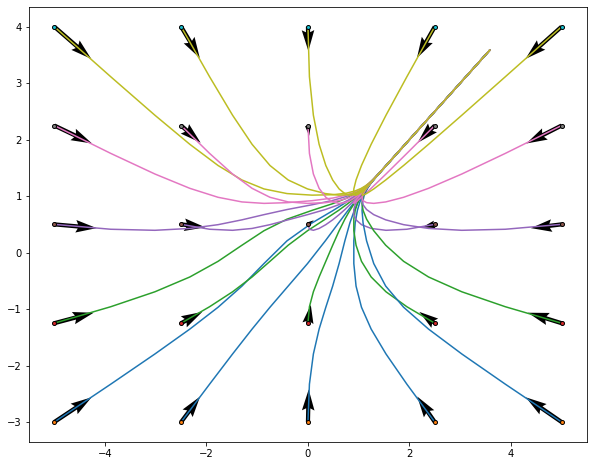

In [ ]:
plt.figure(figsize = (10,8))

tt = np.linspace(0, 50, 200)

xx = np.linspace(-5,5,5)
yy = np.linspace(-3,4,5)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P1(Xm,Ym), Q1(Xm,Ym), scale_units='xy', angles='xy')


for x0 in xx:
    for y0 in yy:
        xy0 = [x0, y0]

        zz = slv.odeint(fun_with_L, xy0, tt)#, args = (Lr, ))
        plt.plot(zz[:,0], zz[:,1])
        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)
'''
mult0 = 1
mult = 4
# сепаратриса
xy0s = [[root+eigvec2_L05[0]*mult0, root+eigvec2_L05[1]*mult0], [root-eigvec2_L05[0]*mult0, root-eigvec2_L05[1]*mult0]]
for xy0 in xy0s:

        zz = slv.odeint(fun0, xy0, tt, args = (L, ))
        plt.plot(zz[:,0], zz[:,1], lw = 2, color='k', label  = 'sep')
        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)

# собственные векторы

plt.plot([root-eigvec1_L05[0]*mult, root+eigvec1_L05[0]*mult], 
        [root-eigvec1_L05[1]*mult, root+eigvec1_L05[1]*mult], 
        '--r', label='$\lambda_2$')

plt.plot([root-eigvec2_L05[0]*mult, root+eigvec2_L05[0]*mult], 
        [root-eigvec2_L05[1]*mult, root+eigvec2_L05[1]*mult], 
        '--b', label='$\lambda_2$')

plt.title('Фазовые траектории, один узел')
plt.axhline(0, color='b', linestyle='--', lw = 1)
#plt.axvline(0, color='b', linestyle='--', lw = 1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
None
'''
plt.show()

Седло


In [ ]:
Lr = 6
P1 = lambda xt,yt: -xt + Lr/(1+yt**2)
Q1 = lambda xt,yt: -yt + Lr/(1+xt**2)

fun1 = lambda p,t: [ P1(p[0],p[1]), Q1(p[0],p[1]) ]


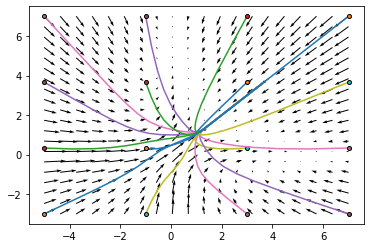

In [ ]:
xx = np.linspace(-5,7,20)
yy = np.linspace(-3,7,20)
Xm,Ym = np.meshgrid(xx,yy)
plt.quiver(Xm,Ym, P1(Xm,Ym), Q1(Xm,Ym), scale_units='xy', angles='xy')

xx = np.linspace(-5,7,4)
yy = np.linspace(-3,7,4)
for x0 in xx:
    for y0 in yy:
        xy0 = [x0, y0]

        zz = slv.odeint(fun_with_L, xy0, tt)#, args = (Lr, ))
        plt.plot(zz[:,0], zz[:,1])
        plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)
None

## Модель хищник-жертва

Модель хищник-жертва задается системой уравнений:

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= \alpha_xx - d_xxy \\
\frac{dy}{dt} &= d_yxy - \beta_yy
\end{aligned}
\right.
$$

Модель имеет бифуркационный фазовый портрет и является неустойчивой 

1. Для того, чтобы численность хищников и жертв не улетала в бесконечность при малых изменений их численности, добавим члены $(1 - \frac{x}{K_x})$ и $(1 - \frac{y}{K_y})$ в уравнения для численности хищников и жертв. Это нужно, чтобы ограничесть емкость среды для хищников и жертв. Для каждого вида будет собственная предельная емкость. Тогда обновленная модель будет выглядеть так:

$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= \alpha_xx(1-\frac{x}{K_x}) - d_xxy \\
\frac{dy}{dt} &= d_yxy - \beta_yy(1-\frac{y}{K_y})
\end{aligned}
\right.
$$

Добавим насыщение поедания жертв при большой численности с помощью членов $\frac{y}{x + D_x}$ и $\frac{y}{x}$


$$
\left\{
\begin{aligned}
\frac{dx}{dt} &= \alpha_xx(1-\frac{x}{K_x}) - \frac{y}{x + D_x} \\
\frac{dy}{dt} &= \frac{D_yy}{x} - \beta_yy(1-\frac{y}{K_y})
\end{aligned}
\right.
$$

Построим фазовый портрет

In [ ]:
ax = 3
d = 2
Kx = 10
by = 1
d = 2
Ky = 7

funk_victim = lambda xt,yt,d: ax*xt*(1-xt/Kx) - d*yt/(xt+d)
func_predator = lambda xt,yt,d: d*yt/xt - by*yt*(1-yt/Ky)


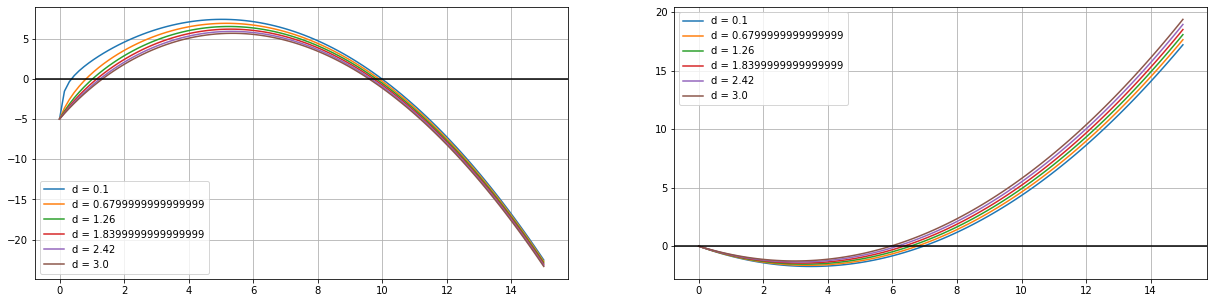

In [ ]:

nn = np.linspace(-1,15,100)
plt.figure(figsize=(21, 5))

plt.subplot(121)

for dd in np.linspace(0.1, 3, 6):
  plt.plot(nn, funk_victim(nn, 5, dd), label=f'd = {dd}')
  # plt.plot(nn, func_predator(nn, nn, dd), label=f'd = {dd}')
# plt.ylim(-100000,100000)
# plt.xlim(-10,700)
plt.grid()
# plt.xlabel('d')
# plt.ylabel('x')
plt.axhline(0, color='black')

plt.legend()

plt.subplot(122)

for dd in np.linspace(0.1, 3, 6):
  # plt.plot(nn, funk_victim(nn, 5, dd), label=f'd = {dd}')
  plt.plot(nn, func_predator(20, nn, dd), label=f'd = {dd}')
# plt.ylim(-100000,100000)
# plt.xlim(-10,700)
plt.grid()
# plt.xlabel('d')
# plt.ylabel('x')
plt.axhline(0, color='black')

plt.legend()
None